<a href="https://colab.research.google.com/github/bimal-bp/Titanic-survival-analysis-and-predictions/blob/ML_MODELS/Titanic_survival_analysis_and_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
import pandas as pd
train=pd.read_csv('/content/drive/MyDrive/train.csv')
test=pd.read_csv('/content/drive/MyDrive/test.csv')

In [224]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [225]:
train.shape

(891, 12)

In [226]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [227]:
test.shape

(418, 11)

In [228]:
round(train.describe(),3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [229]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [230]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [231]:
df=train.copy()

In [232]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [233]:

df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [234]:
df.loc[(df.Survived ==1)&(df.Sex=='male'),:].count()

PassengerId    109
Survived       109
Pclass         109
Name           109
Sex            109
Age             93
SibSp          109
Parch          109
Ticket         109
Fare           109
Cabin           45
Embarked       109
dtype: int64

In [235]:
# there were 109 males across the ship who survived that accident

In [236]:
df.loc[(df.Survived==1)&(df.Sex=="female"),:].count()

PassengerId    233
Survived       233
Pclass         233
Name           233
Sex            233
Age            197
SibSp          233
Parch          233
Ticket         233
Fare           233
Cabin           91
Embarked       231
dtype: int64

In [237]:
# there were 233 females across the ship who survived that accident

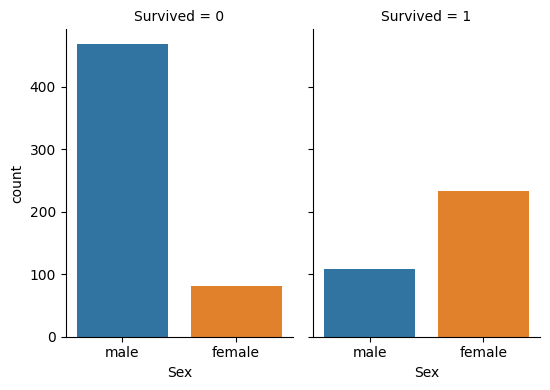

In [238]:
import seaborn as sns
sns.catplot(x="Sex",col="Survived",data=df,kind="count",height=4,aspect=.7)

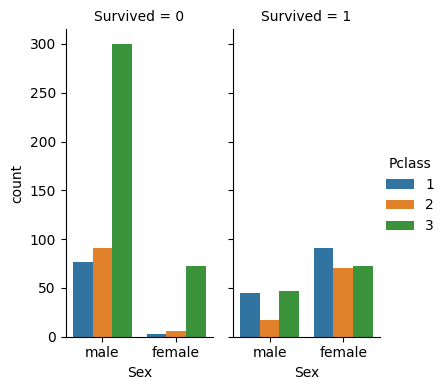

In [239]:
import seaborn as sns

# Create the count plot
sns.catplot(x="Sex", hue="Pclass", col="Survived", data=df, kind="count", height=4, aspect=0.5)


In [240]:
df.loc[(df.Survived==1)&(df.Sex=="male")&(df.Pclass==1)].count()

PassengerId    45
Survived       45
Pclass         45
Name           45
Sex            45
Age            40
SibSp          45
Parch          45
Ticket         45
Fare           45
Cabin          39
Embarked       45
dtype: int64

In [241]:
df.loc[(df.Survived==1)&(df.Sex=="male")&(df.Pclass==2)].count()

PassengerId    17
Survived       17
Pclass         17
Name           17
Sex            17
Age            15
SibSp          17
Parch          17
Ticket         17
Fare           17
Cabin           4
Embarked       17
dtype: int64

In [242]:
df.loc[(df.Survived==1)&(df.Sex=="male")&(df.Pclass==3)].count()

PassengerId    47
Survived       47
Pclass         47
Name           47
Sex            47
Age            38
SibSp          47
Parch          47
Ticket         47
Fare           47
Cabin           2
Embarked       47
dtype: int64

In [243]:
pd.crosstab(df.Pclass,df.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [244]:
# % of survived from pclass1
s1=136/219
round(s1,2)

0.62

In [245]:
#% of survived from  pclass 2
s2=87/184
round(s2,2)

0.47

In [246]:
#% of survived from  pclass 3
s3=119/491
round(s3,2)

0.24

In [247]:
# % survived in Pclass = 1  --> 62.96 %  ,

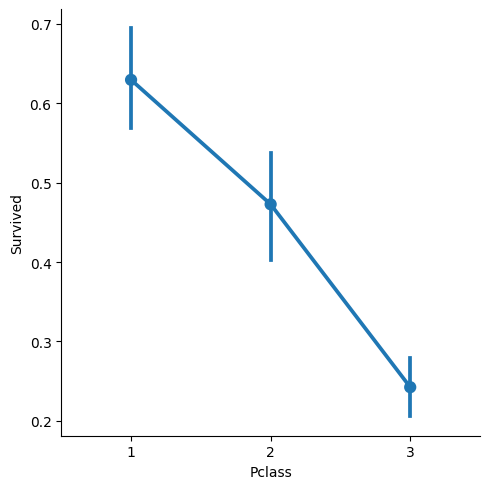

In [248]:
sns.catplot(x='Pclass',y='Survived',kind="point",data=df)

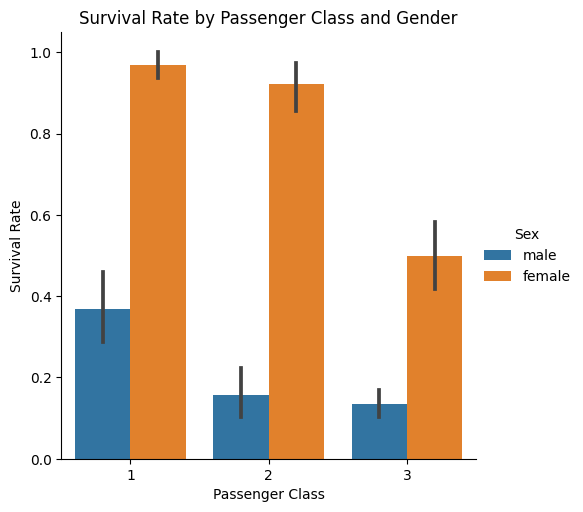

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=df)

# Optionally, you can set labels and a title
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class and Gender')

plt.show()


In [250]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [251]:
# Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died

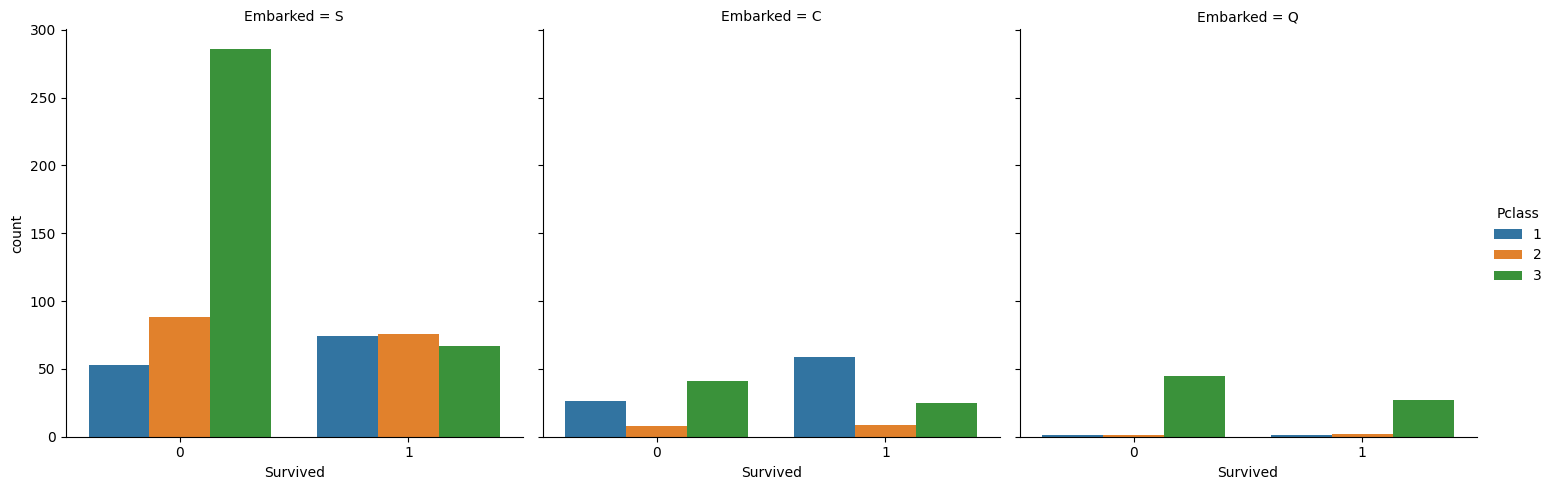

In [252]:
sns.catplot(x="Survived",col="Embarked",hue="Pclass",kind='count',data=df)

In [253]:
pd.crosstab([df.Survived],[df.Sex,df.Pclass,df.Embarked],margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

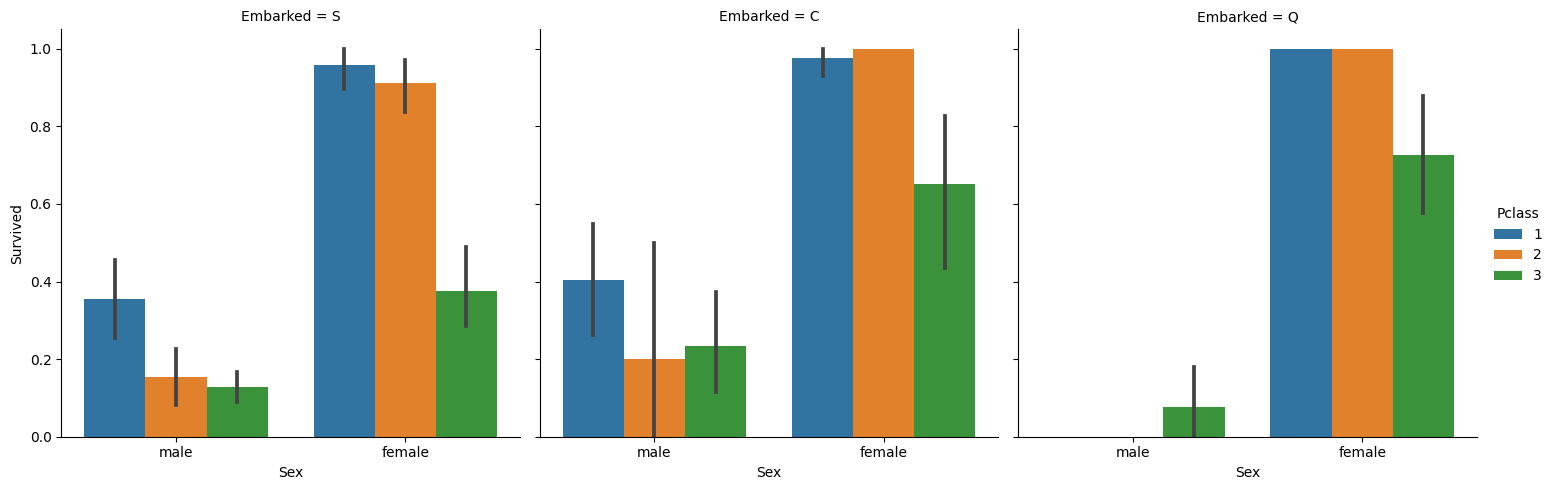

In [254]:
sns.catplot(x="Sex",y="Survived",col="Embarked",hue="Pclass",data=df,kind="bar")

In [255]:
context1 = {"female":0 , "male":1}
context2 = {"S":0 , "C":1 , "Q":2}
df['Sex_bool']=df.Sex.map(context1)
df["Embarked_bool"] = df.Embarked.map(context2)

In [256]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bool,Embarked_bool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.0


In [257]:
import numpy as np

<Axes: >

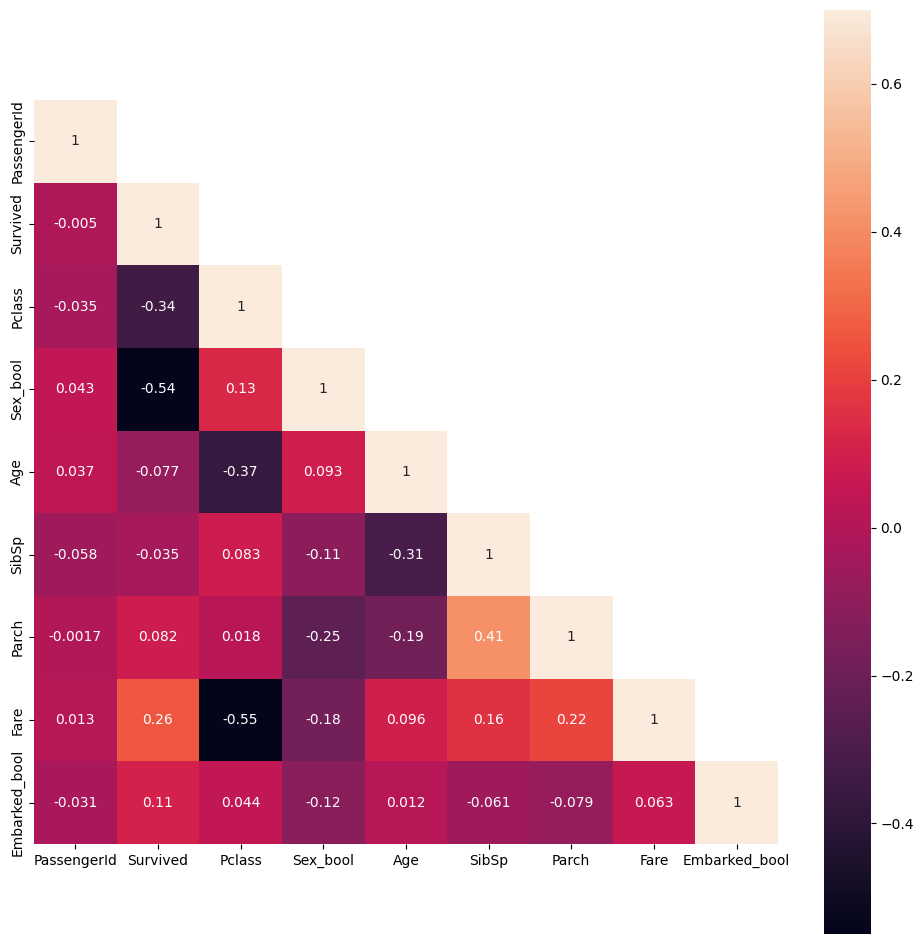

In [258]:
corr_map=df[['PassengerId','Survived','Pclass','Sex_bool','Age','SibSp','Parch','Fare','Embarked_bool']].corr()
obj=np.array(corr_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(corr_map,mask=obj,vmax=.7,square=True,annot=True)

The above heatmap shows the overall picture very clearly
PassengerId is a redundant column as its very much less related to all other attributes , we can remove it .

Also , Survived is related indirectly with Pclass and also we earlier proved that as Pclass value increases Survival decreases

Pclass and Age are also inversely related and can also be proven by the following cell that as Pclass decreases , the mean of the Age increases , means the much of the older travellers are travelling in high class .

Pclass and fare are also highly inversely related as the fare of Pclass 1 would obviously be higher than corresponding Pclass 2 and 3 .

Also , people with lower ages or children are travelling with their sibling and parents more than higher aged people (following an inverse relation) , which is quite a bit obvious .

Parch and SibSp are also highly directly related
Sex_bool and Survived people are highly inversely related , i.e. females are more likely to survive than men

In [259]:
df.groupby("Pclass").Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [260]:
for x in [train, test,df]:
    x['Age_bin']=np.nan
    for i in range(8,0,-1):
        x.loc[ x['Age'] <= i*10, 'Age_bin'] = i

In [261]:
df[["Age" , "Age_bin"]].head(10)

,Age,Age_bin
0,22.0,3.0
1,38.0,4.0
2,26.0,3.0
3,35.0,4.0
4,35.0,4.0
5,NaN,NaN
6,54.0,6.0
7,2.0,1.0
8,27.0,3.0
9,14.0,2.0


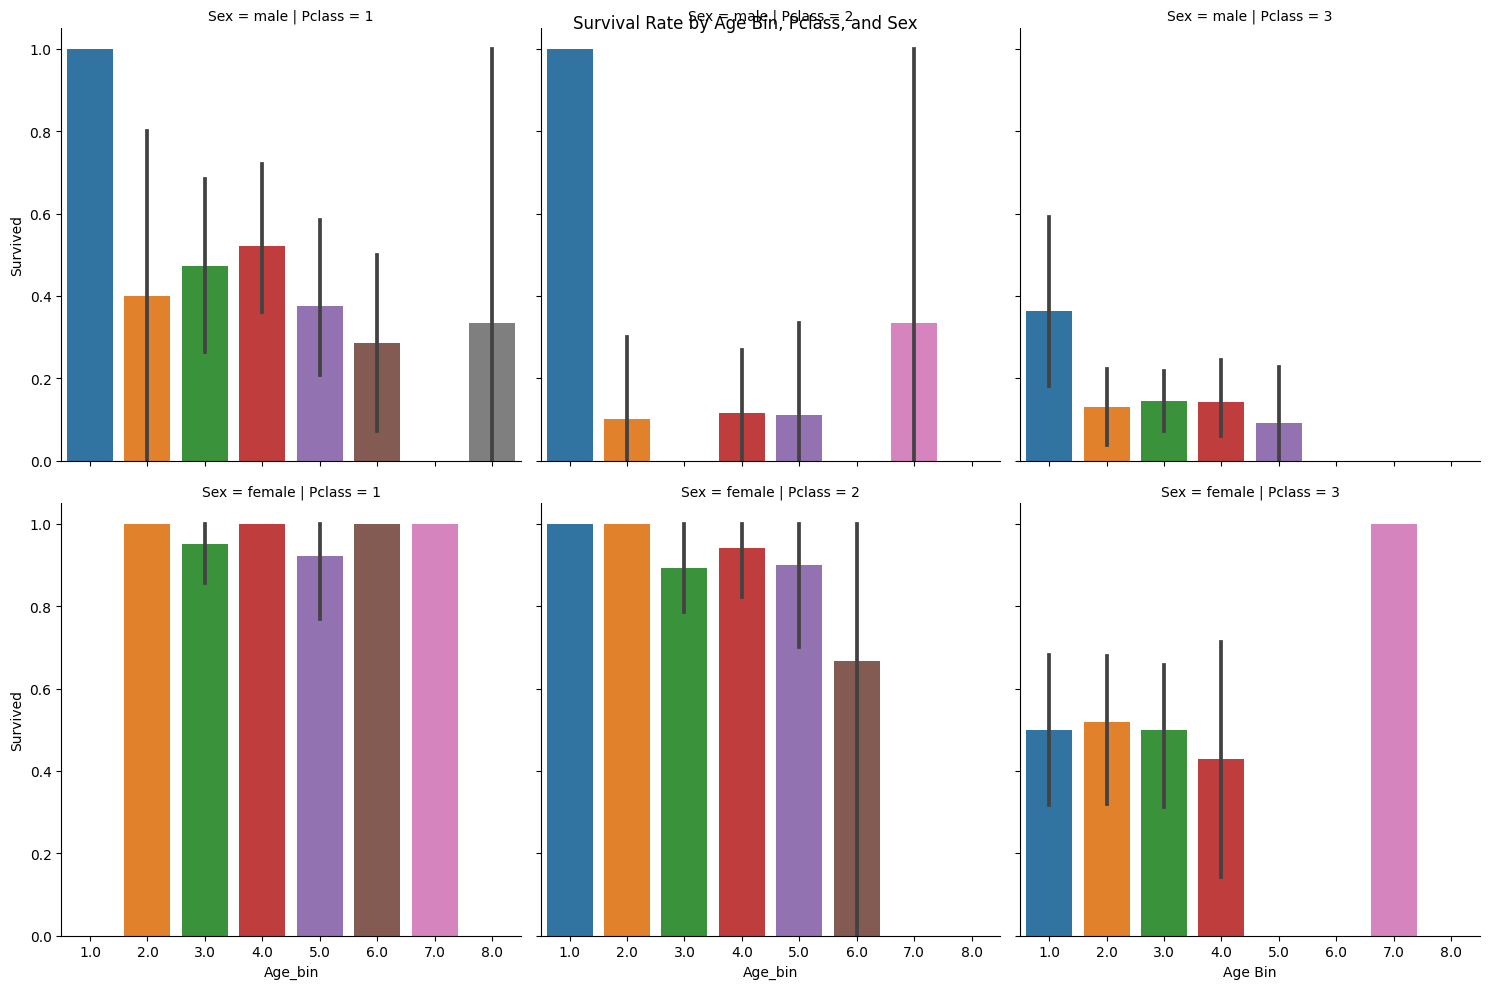

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the categorical plot
sns.catplot(x='Age_bin', y='Survived', col='Pclass', row='Sex', kind='bar', data=df)

# Optionally, you can set labels and a title
plt.xlabel('Age Bin')
plt.ylabel('Survival Rate')
plt.suptitle('Survival Rate by Age Bin, Pclass, and Sex')  # Adjust the title position

plt.show()


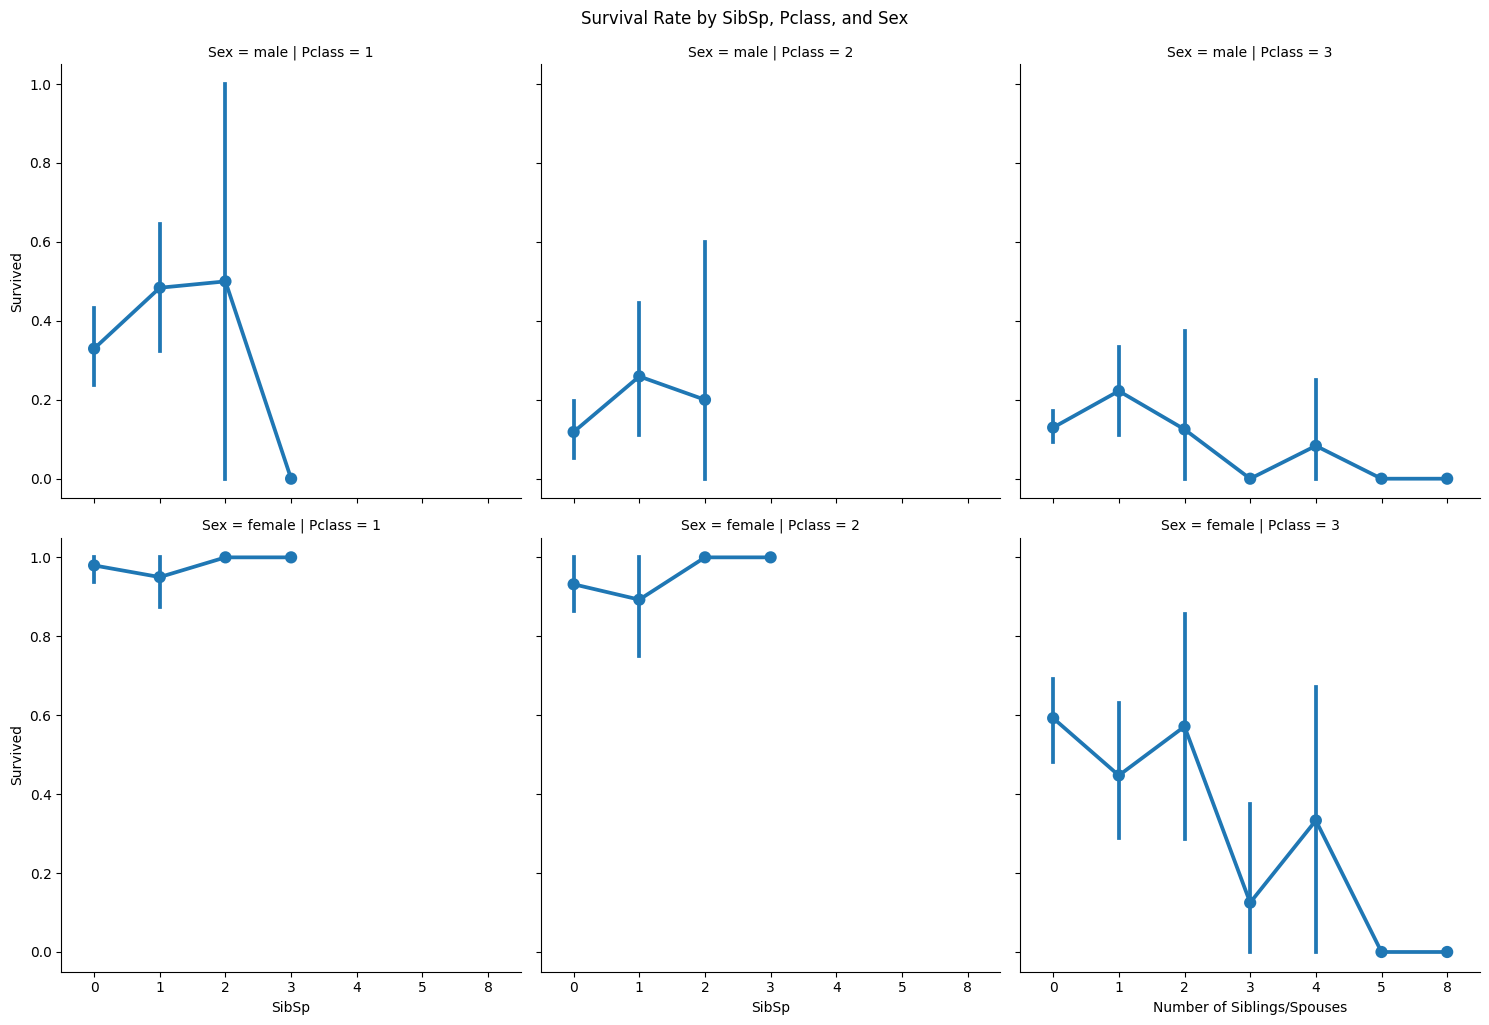

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the categorical plot with a bar plot
sns.catplot(x='SibSp', y='Survived', col='Pclass', row='Sex', kind='point', data=df)

# Optionally, you can set labels and a title
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.suptitle('Survival Rate by SibSp, Pclass, and Sex', y=1.02)  # Adjust the title position

plt.show()


In [264]:
#  Females in Pclass 1 and 2 with siblings upto 3 nearly all survived
#  For Pclass 3 , males and females showed a near decreasing trend as number of siblings increased .
#  For males, no survival rate above 0.5 for any values of SibSp. (less than 50 %)

In [265]:
pd.crosstab([df.Sex,df.Survived],[df.Parch,df.Pclass],margins=True)

Parch              0             1           2          3     4     5  6  All
Pclass             1    2    3   1   2   3   1   2   3  2  3  1  3  3  3     
Sex    Survived                                                              
female 0           1    5   35   0   1  13   2   0  17  0  1  0  2  3  1   81
       1          63   40   50  17  17  12  11  11   8  2  1  0  0  1  0  233
male   0          63   81  260  10   7  22   3   3  15  0  1  1  1  1  0  468
       1          36    8   36   4   7   8   5   2   3  0  0  0  0  0  0  109
All              163  134  381  31  32  55  21  16  43  2  3  1  3  5  1  891

<ipython-input-266-a82972257014>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.SibSp , shade=True, color="red" , ax= axes[0])
<ipython-input-266-a82972257014>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.Parch , shade=True, color="red" , ax= axes[1])
<ipython-input-266-a82972257014>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.Age_bin , shade=True, color="red" , ax= axes[2])
<ipython-input-266-a82972257014>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.Fare , shade=True, co

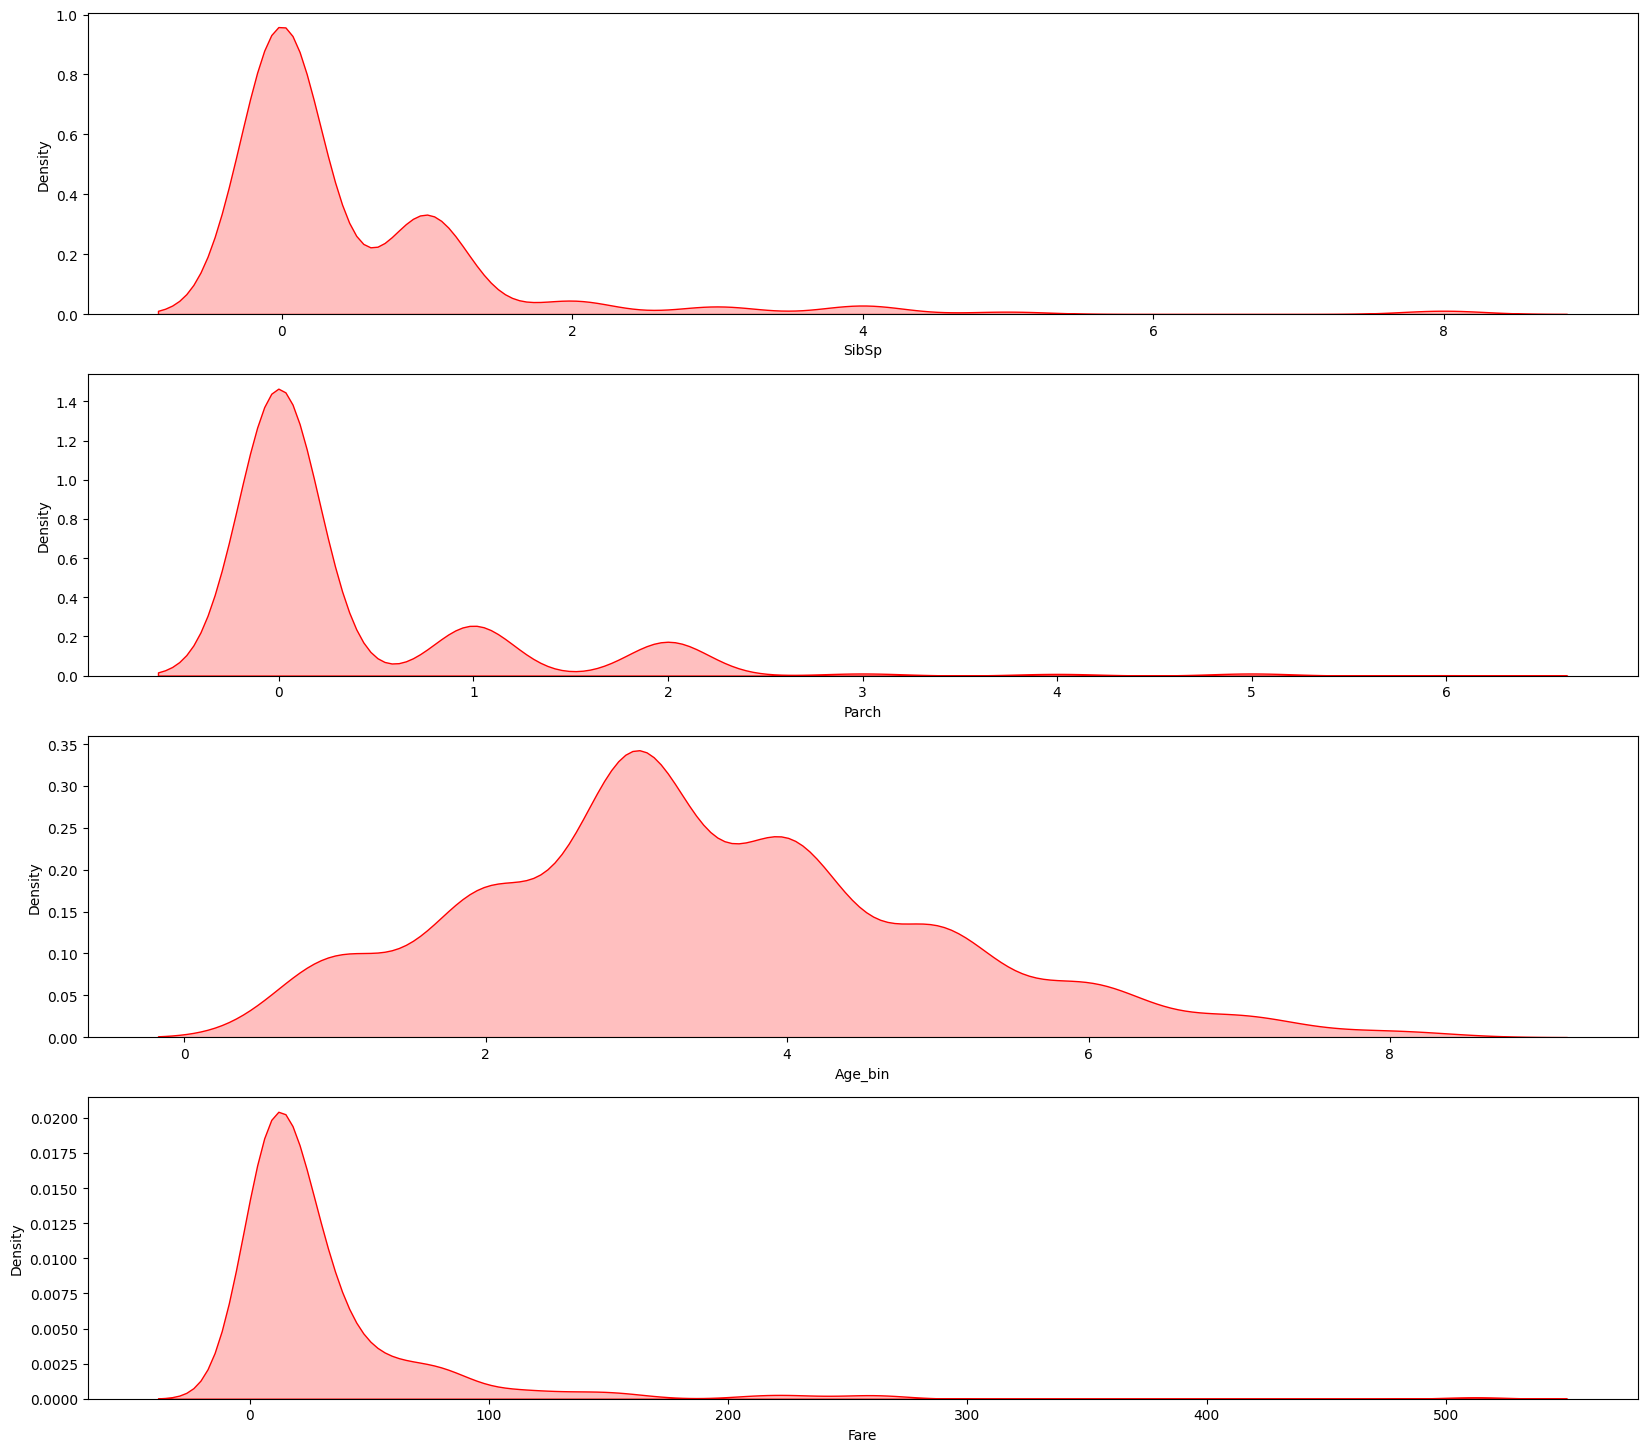

In [266]:
fig, axes = plt.subplots(4,1)
fig.set_size_inches(20, 18)
sns.kdeplot(df.SibSp , shade=True, color="red" , ax= axes[0])
sns.kdeplot(df.Parch , shade=True, color="red" , ax= axes[1])
sns.kdeplot(df.Age_bin , shade=True, color="red" , ax= axes[2])
sns.kdeplot(df.Fare , shade=True, color="red" , ax= axes[3])
plt.show()

In [267]:
# Maximum people are with no siblings travelling
# more people were travelling with only their 1 parent rather than 2
# maximum population on the ship was aged between 15 yrs to 50 yrs.
# most of the people only paid upto 50 as their fare

In [268]:
for x in [train, test , df]:
    x['Fare_bin']=np.nan
    for i in range(12,0,-1):
        x.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i

In [269]:
df[['Fare','Fare_bin']].head(10)

,Fare,Fare_bin
0,7.2500,1.0
1,71.2833,2.0
2,7.9250,1.0
3,53.1000,2.0
4,8.0500,1.0
5,8.4583,1.0
6,51.8625,2.0
7,21.0750,1.0
8,11.1333,1.0
9,30.0708,1.0


In [270]:
pd.crosstab([df.Sex,df.Survived],[df.Fare_bin,df.Pclass],margins=True)

Fare_bin        1.0           2.0        3.0 4.0 5.0 6.0 11.0  All
Pclass            1    2    3   1  2   3   1   1   1   1    1     
Sex    Survived                                                   
female 0          1    6   69   0  0   3   0   2   0   0    0   81
       1         11   68   72  48  2   0  15   5   7   4    1  233
male   0         42   86  294  23  5   6   5   1   4   2    0  468
       1         23   17   42  15  0   5   4   1   0   0    2  109
All              77  177  477  86  7  14  24   9  11   6    3  891

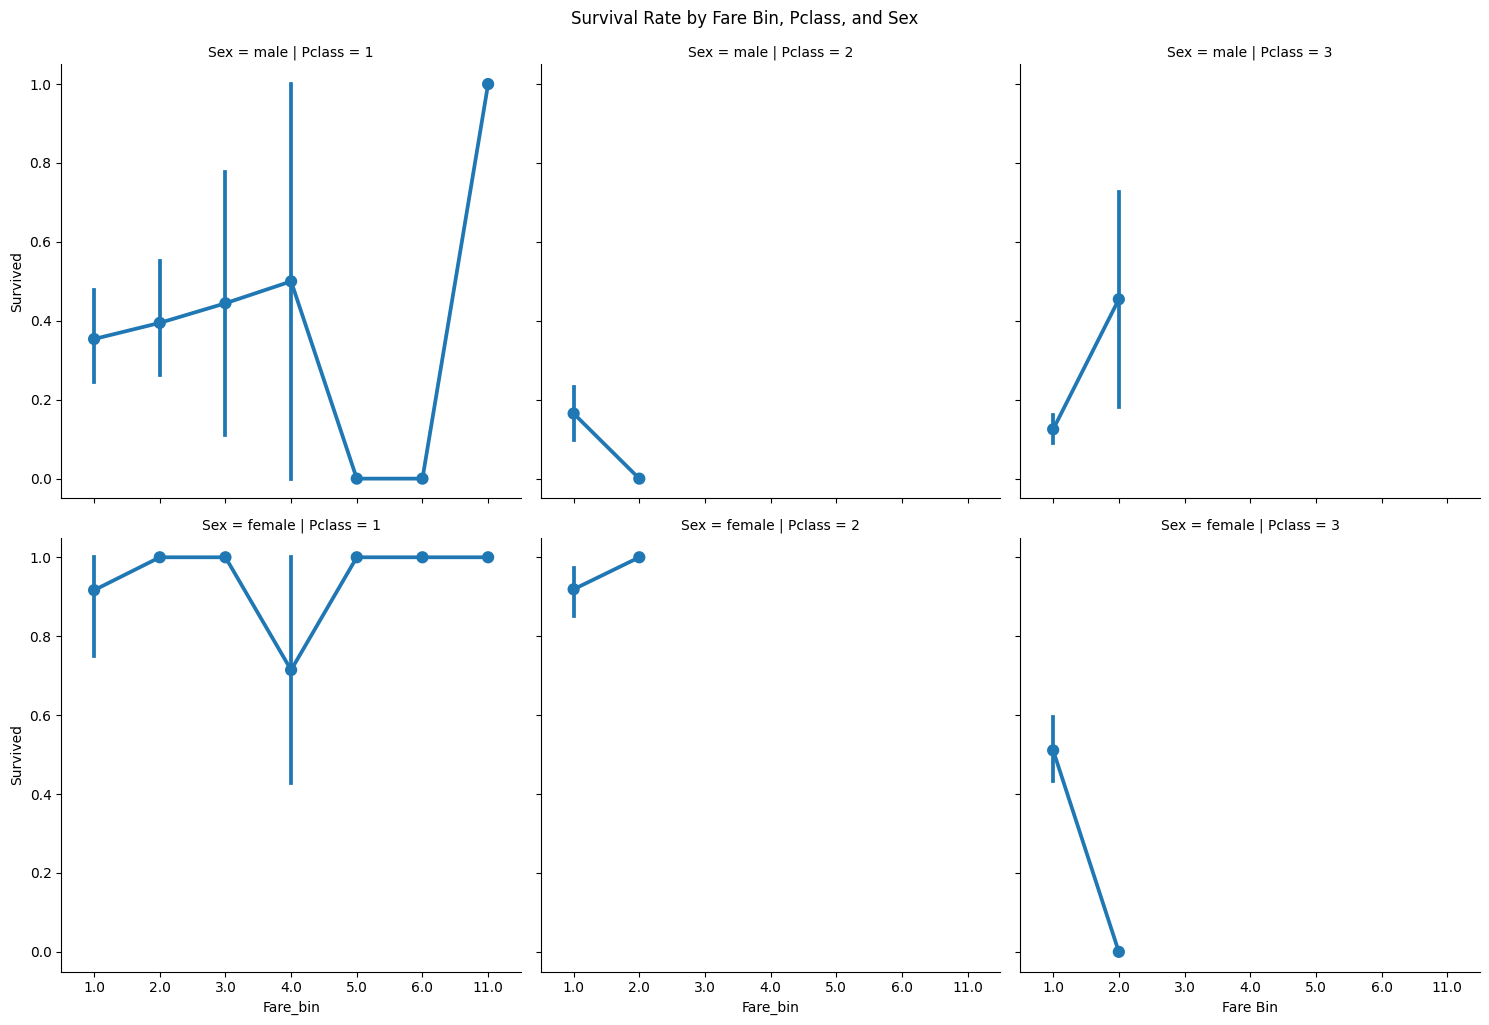

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the categorical plot with a point plot
sns.catplot(x='Fare_bin', y='Survived', col='Pclass', row='Sex', kind='point', data=df)

# Optionally, you can set labels and a title
plt.xlabel('Fare Bin')
plt.ylabel('Survival Rate')
plt.suptitle('Survival Rate by Fare Bin, Pclass, and Sex', y=1.02)  # Adjust the title position

plt.show()


In [272]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bool,Embarked_bool,Age_bin,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,3.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0,4.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.0,3.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0.0,4.0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0.0,4.0,1.0


In [273]:
df_test=test.copy()
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,4.0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,5.0,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,7.0,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,3.0,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3.0,1.0


In [274]:
df.drop(['PassengerId','Sex','Embarked','Name','Ticket', 'Cabin', 'Age', 'Fare'],axis=1,inplace=True)
df.head()

,Survived,Pclass,SibSp,Parch,Sex_bool,Embarked_bool,Age_bin,Fare_bin
0,0,3,1,0,1,0.0,3.0,1.0
1,1,1,1,0,0,1.0,4.0,2.0
2,1,3,0,0,0,0.0,3.0,1.0
3,1,1,1,0,0,0.0,4.0,2.0
4,0,3,0,0,1,0.0,4.0,1.0


In [275]:
context1 = {"female":0 , "male":1}
context2 = {"S":0 , "C":1 , "Q":2}
df_test['Sex_bool']=df_test.Sex.map(context1)
df_test["Embarked_bool"] = df_test.Embarked.map(context2)
df_test.drop(['PassengerId','Sex','Embarked','Name','Ticket', 'Cabin', 'Age', 'Fare'],axis=1,inplace=True)
df_test.head()

,Pclass,SibSp,Parch,Age_bin,Fare_bin,Sex_bool,Embarked_bool
0,3,0,0,4.0,1.0,1,2
1,3,1,0,5.0,2.0,0,0
2,2,0,0,7.0,1.0,1,2
3,3,0,0,3.0,2.0,1,0
4,3,1,1,3.0,1.0,0,0


In [276]:
df.isnull().sum()

Survived           0
Pclass             0
SibSp              0
Parch              0
Sex_bool           0
Embarked_bool      2
Age_bin          177
Fare_bin           0
dtype: int64

In [277]:
df_test.isnull().sum()

Pclass            0
SibSp             0
Parch             0
Age_bin          86
Fare_bin          0
Sex_bool          0
Embarked_bool     0
dtype: int64

In [278]:
df_test.Age_bin.fillna(df_test.Age_bin.mean() , inplace=True)

In [279]:
df.Age_bin.fillna(df.Age_bin.mean() , inplace=True)

In [280]:
df.Embarked_bool.fillna(df.Embarked_bool.mean() , inplace=True)

In [294]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


ImportError: ignored

In [295]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.3, random_state=101)


In [296]:
MLA = []
x = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() , GaussianNB() ,
    RandomForestClassifier() , GradientBoostingClassifier()]

X = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" , "GaussianNB" ,
    "RandomForestClassifier" , "GradientBoostingClassifier"]

for i in range(0,len(x)):
    model = x[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    MLA.append(accuracy_score(pred , y_test))

In [297]:
MLA

[0.7761194029850746,
 0.7985074626865671,
 0.7686567164179104,
 0.7910447761194029,
 0.75,
 0.7947761194029851,
 0.8022388059701493]

<Axes: ylabel='Density'>

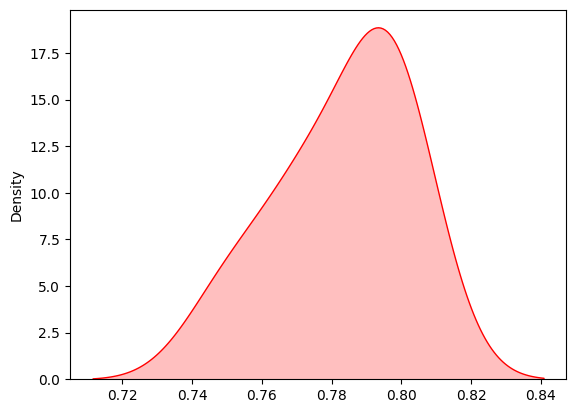

In [298]:
sns.kdeplot(MLA , shade=True, color="red")

In [299]:
d = { "Accuracy" : MLA , "Algorithm" : X }
dfm = pd.DataFrame(d)

In [300]:
dfm

,Accuracy,Algorithm
0,0.776119,LinearSVC
1,0.798507,DecisionTreeClassifier
2,0.768657,LogisticRegression
3,0.791045,KNeighborsClassifier
4,0.750000,GaussianNB
5,0.794776,RandomForestClassifier
6,0.802239,GradientBoostingClassifier


In [301]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.3, random_state=66)
model = KNeighborsClassifier(n_neighbors=6)
model.fit( X_train , y_train )

KNeighborsClassifier(n_neighbors=6)

In [302]:
pred = model.predict(X_test)

In [303]:
print (accuracy_score(pred , y_test))

0.832089552238806


In [305]:
KNNaccu = []
Neighbours = []

for neighbour in range(1,31):
    model = KNeighborsClassifier(n_neighbors=neighbour)
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    KNNaccu.append(accuracy_score(pred , y_test))
    Neighbours.append(neighbour)

In [306]:
d = { "Neighbours" : Neighbours , "Accuracy" : KNNaccu }
knndf = pd.DataFrame(d)

In [307]:
knndf.head()

,Neighbours,Accuracy
0,1,0.794776
1,2,0.820896
2,3,0.809701
3,4,0.835821
4,5,0.817164


The final output is around 84% for KNeighborsClassifier